In [3]:
using POMDPs
using POMDPModels: SimpleGridWorld
using POMDPPolicies: FunctionPolicy
using POMDPSimulators: RolloutSimulator, stepthrough
using QuickPOMDPs
using Distributions
using Plots

In [10]:
lqr = QuickMDP(
	statetype=Float64,
	actiontype=Float64,
	gen = (s, a, rng) -> (sp = s + 0.2*a + 0.1*randn(rng), r = -s^2),
	initialstate = Normal(0.0, 1.0)
)

QuickMDP{UUID("edf3e245-002e-400d-81f0-530299cbe8a1"), Float64, Float64, NamedTuple{(:isterminal, :statetype, :initialstate, :gen, :discount, :actiontype), Tuple{Bool, DataType, Normal{Float64}, var"#19#20", Float64, DataType}}}((isterminal = false, statetype = Float64, initialstate = Normal{Float64}(μ=0.0, σ=1.0), gen = var"#19#20"(), discount = 1.0, actiontype = Float64))

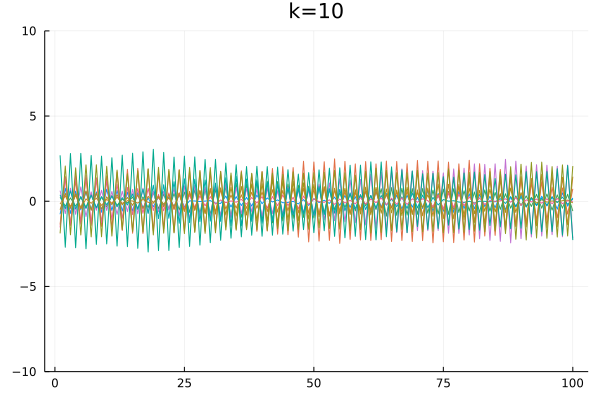

In [14]:
k=10
policy = FunctionPolicy(s->-k*s)
trajs = [collect(stepthrough(lqr, policy, "s", max_steps=100)) for _ in 1:10]
plot(trajs, ylim=(-10, 10), legend=nothing, title="k=$k")

In [7]:
function mc_evaluate(k, m=10)
	p = FunctionPolicy(s->-k*s)
	rsum = 0.0
	for _ in 1:m
		rsum += simulate(RolloutSimulator(max_steps=100), lqr, p)
	end
	return rsum/m
end

mc_evaluate (generic function with 2 methods)

In [15]:
plots = []
# initial distribution for k
d = Uniform(-1.0, 10.0)

for _ in 1:100		
	# sample a population
	pop = rand(d, 100)
	evals = map(mc_evaluate, pop)
	
	# find the best
	elite = sortperm(evals, rev=true)[1:10]
	
	# fit the new distribution
	global d = fit(Normal, pop[elite])
		
	# (plot)
	p = plot(pop, evals, line=:stem, marker=:circle, ylim=(-10,2), label=nothing, color=:blue)
	plot!(p, pop[elite], evals[elite], line=:stem, marker=:circle, ylim=(-10,2), xlim=(-1,10), label="Elite", color="red")
	plot!(p, -1:0.01:10, x->2*pdf(d, x), label="Fit")
	push!(plots, p)
end

In [16]:
using Interact

@manipulate for i in 1:length(plots)
    plots[i]
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/zach/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/zach/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/zach/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/home/zach/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/home/zach/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f67443c4d00, Task (runnable) @0x00007f67443c4d00), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\"